In [27]:
%matplotlib inline

In [28]:
from urllib.request import urlopen

import numpy as np
import cv2
from matplotlib import pyplot as plt

In [29]:
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, RandomBrightnessContrast, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, Flip, OneOf, Compose
)

In [30]:
def download_image(url):
    data = urlopen(url).read()
    data = np.frombuffer(data, np.uint8)
    print(data)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [31]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [32]:
image = download_image('https://d177hi9zlsijyy.cloudfront.net/wp-content/uploads/sites/2/2018/05/11202041/180511105900-atlas-boston-dynamics-robot-running-super-tease.jpg')

[255 216 255 ... 153 255 217]


In [33]:
image.shape

(619, 1100, 3)

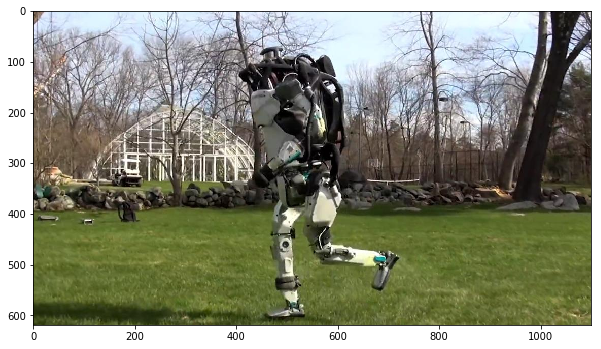

In [34]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

In [35]:
def augment_and_show(aug, image):
    image = aug(image=image)['image']
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

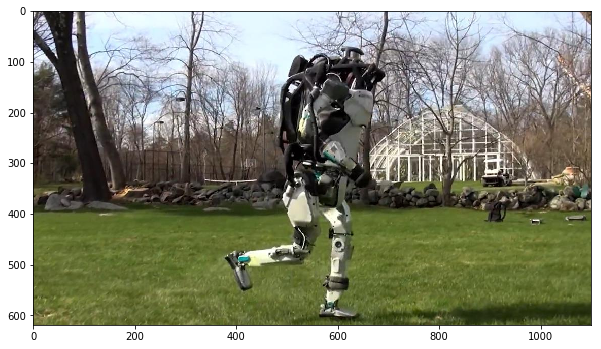

In [36]:
aug = HorizontalFlip(p=1)
augment_and_show(aug, image)

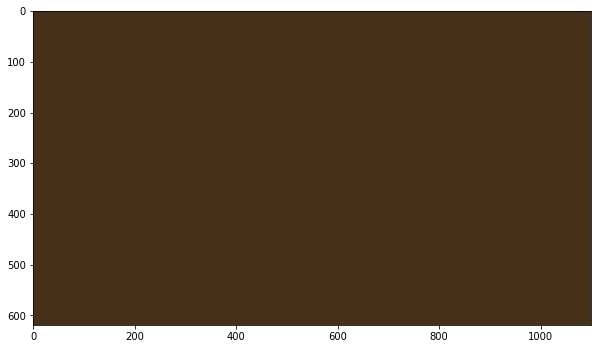

In [37]:
aug = IAAPerspective(scale=0.2, p=1)
augment_and_show(aug, image)

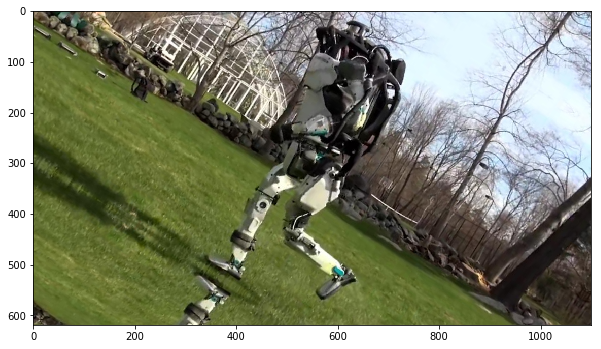

In [38]:
aug = ShiftScaleRotate(p=1)
augment_and_show(aug, image)

In [39]:
def augment_flips_color(p=.5):
    return Compose([
        CLAHE(),
        RandomRotate90(),
        Transpose(),
        ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50, rotate_limit=45, p=.75),
        Blur(blur_limit=3),
        OpticalDistortion(),
        GridDistortion(),
        HueSaturationValue()
    ], p=p)

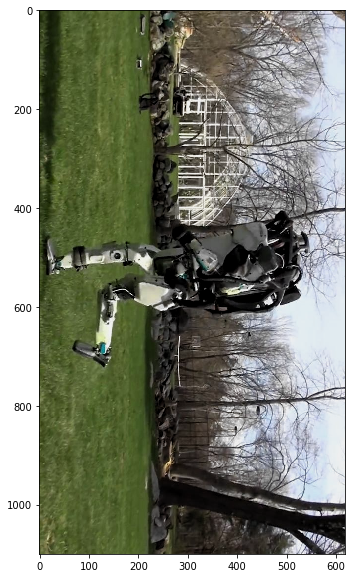

In [40]:
aug = augment_flips_color(p=1)
augment_and_show(aug, image)

In [41]:
def strong_aug(p=.5):
    return Compose([
        RandomRotate90(),
        Flip(),
        Transpose(),
        OneOf([
            IAAAdditiveGaussianNoise(),
            GaussNoise(),
        ], p=0.2),
        OneOf([
            MotionBlur(p=.2),
            MedianBlur(blur_limit=3, p=0.1),
            Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        OneOf([
            OpticalDistortion(p=0.3),
            GridDistortion(p=.1),
            IAAPiecewiseAffine(p=0.3),
        ], p=0.2),
        OneOf([
            CLAHE(clip_limit=2),
            IAASharpen(),
            IAAEmboss(),
            RandomBrightnessContrast(),            
        ], p=0.3),
        HueSaturationValue(p=0.3),
    ], p=p)


In [123]:
def strong_aug(p=1):
    return Compose([
        RandomRotate90(p=0.1),
        Flip(p=1),
        Transpose(p=0.4),
        OneOf([
            IAAAdditiveGaussianNoise(p=0.9),
            GaussNoise(p=0.9),
        ], p=0.2),
        OneOf([
            MotionBlur(p=.1),
            MedianBlur(blur_limit=1, p=0.4),
            Blur(blur_limit=3, p=0.9),
        ], p=0.2),
        ShiftScaleRotate(
            shift_limit=0.0625, 
            scale_limit=0.1, 
            rotate_limit=45, 
            p=0.4),
        OneOf([
            OpticalDistortion(p=0.9),
            GridDistortion(p=.1),
            IAAPiecewiseAffine(p=0.1),
        ], p=0.2),
        OneOf([
            CLAHE(clip_limit=10),
            IAASharpen(p=0.1),
            IAAEmboss(p=0.1),
            RandomBrightnessContrast(contrast_limit=0.9),            
        ], p=0.9),
        HueSaturationValue(p=0.9),
    ], p=p)

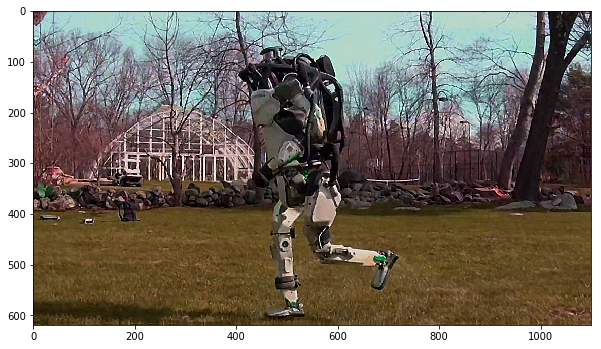

In [129]:
aug = strong_aug()
augment_and_show(aug, image)